In [1]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

In [2]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
4,pretrained,decision_tree,Transformer,depth=4,-1,-1,20,12,8,decision_tree_pretrained
1,pretrained,linear_regression,Transformer,,-1,-1,20,12,8,linear_regression_pretrained
0,fb64129b-0a9d-4b9b-9c54-c7eafb393c4e,linear_regression,Transformer,,-1,-1,5,12,8,linear_regression_toy
2,pretrained,relu_2nn_regression,Transformer,hidden_layer_size=100,-1,-1,20,12,8,relu_2nn_regression_pretrained
3,pretrained,sparse_linear_regression,Transformer,sparsity=3,-1,-1,20,12,8,sparse_regression_pretrained


In [3]:
task = "linear_regression"
#task = "sparse_linear_regression"
# task = "decision_tree"
#task = "relu_2nn_regression"

run_id = "pretrained"  # if you train more models, replace with the run_id from the table above

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = False

if recompute_metrics:
    get_run_metrics(run_path)  # these are normally precomputed at the end of training

# Plot pre-computed metrics

run_name: linear_regression_pretrained, id: pretrained
------------------------
conf: Munch({'config': 'conf/linear_regression.yaml', 'inherit': ['base.yaml'], 'model': Munch({'family': 'gpt2', 'n_dims': 20, 'n_embd': 256, 'n_head': 8, 'n_layer': 12, 'n_positions': 101}), 'out_dir': '../models/linear_regression', 'test_run': False, 'training': Munch({'batch_size': 64, 'curriculum': Munch({'dims': Munch({'end': 20, 'inc': 1, 'interval': 2000, 'start': 5}), 'points': Munch({'end': 41, 'inc': 2, 'interval': 2000, 'start': 11})}), 'data': 'gaussian', 'keep_every_steps': 100000, 'learning_rate': 0.0001, 'num_tasks': None, 'resume_id': None, 'save_every_steps': 1000, 'task': 'linear_regression', 'task_kwargs': Munch({}), 'train_steps': 500001}), 'wandb': Munch({'entity': 'in-context', 'log_every_steps': 100, 'name': 'linear_regression_pretrained', 'notes': '', 'project': 'in-context-training'})})
should have random:{'standard': {'prompting_strategy': 'standard'}, 'random_quadrants': {'prompt

100%|██████████| 15/15 [00:00<00:00, 168220.75it/s]

------------------------
metrics: {'standard': {'gpt2_embd=256_layer=12_head=8': {'mean': [19.643009185791016, 18.571331024169922, 16.084728240966797, 16.779163360595703, 15.791740417480469, 14.707921981811523, 13.453783988952637, 13.345773696899414, 12.194974899291992, 11.798070907592773, 10.256810188293457, 9.364424705505371, 8.196996688842773, 6.595562934875488, 6.276876926422119, 4.959110260009766, 4.112771034240723, 3.213744640350342, 2.172025203704834, 1.275264024734497, 0.41347265243530273, 0.154807448387146, 0.07651586830615997, 0.053579676896333694, 0.04081684350967407, 0.03197057917714119, 0.024854857474565506, 0.023589100688695908, 0.019652966409921646, 0.017801906913518906, 0.016693448647856712, 0.015271605923771858, 0.01534880418330431, 0.013313351199030876, 0.014173622243106365, 0.012941474094986916, 0.01275083888322115, 0.0124859269708395, 0.011602153070271015, 0.01240842230618, 0.011517172679305077], 'std': [28.91737937927246, 27.84091567993164, 24.95547103881836, 25.93

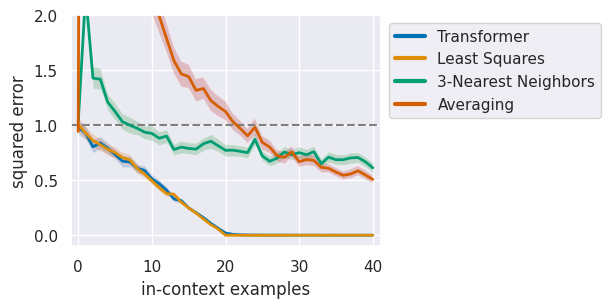

In [4]:
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task]
basic_plot(metrics["standard"], models=models)
plt.show()

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


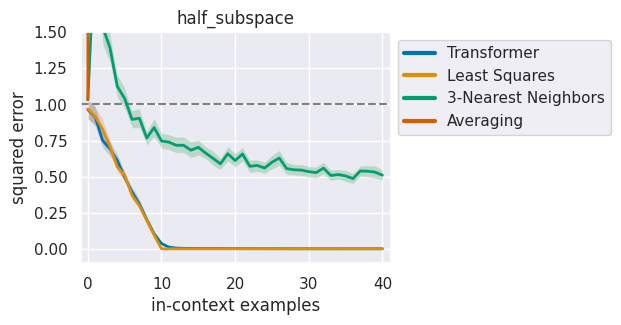

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


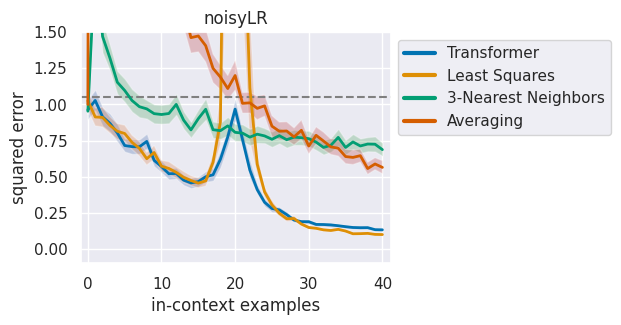

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


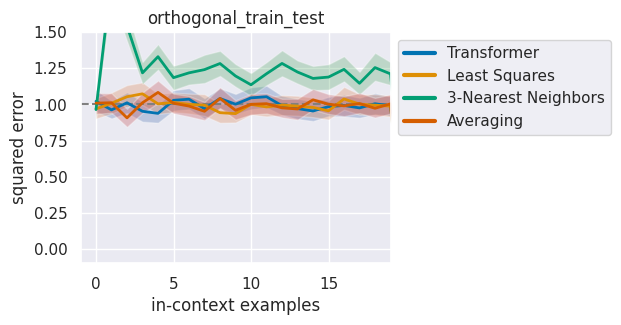

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


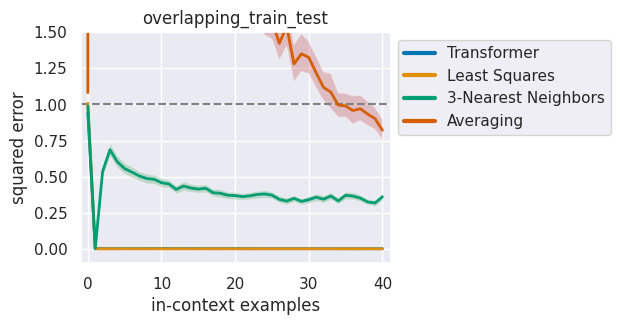

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


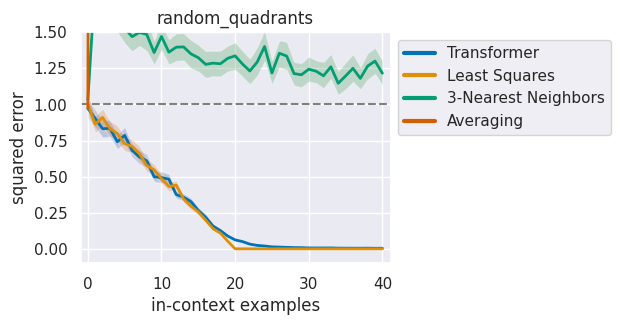

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


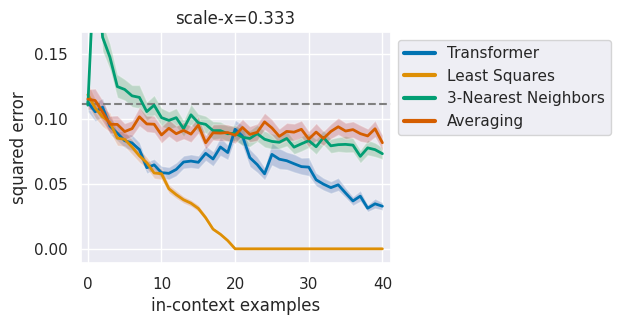

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


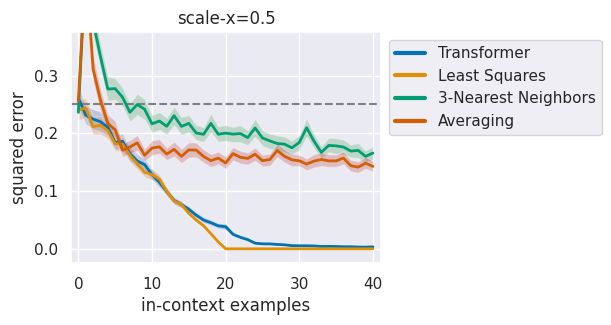

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


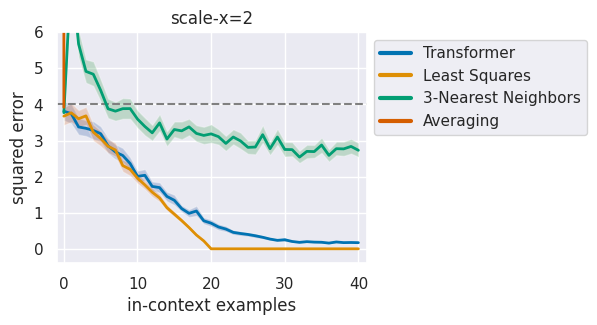

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


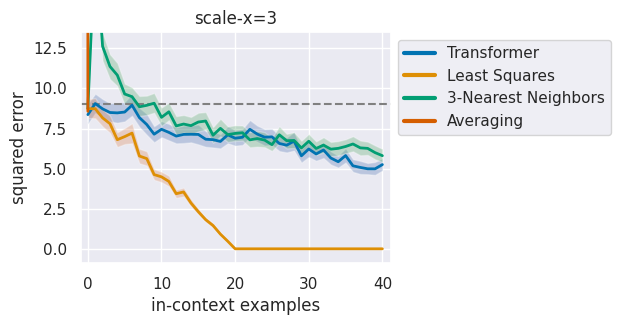

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


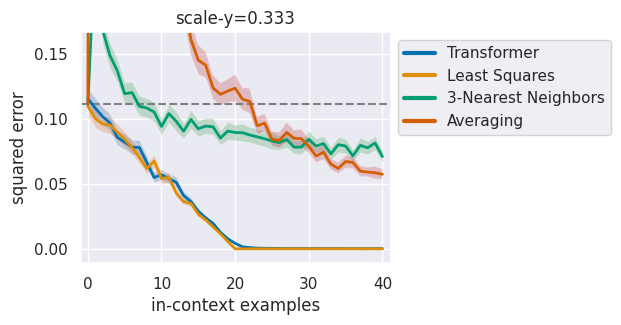

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


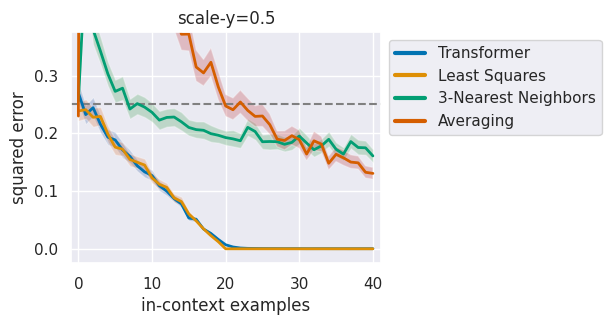

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


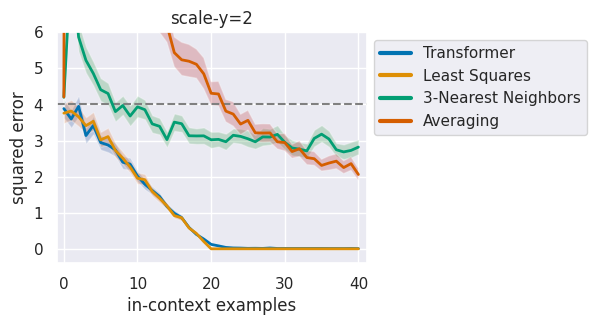

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


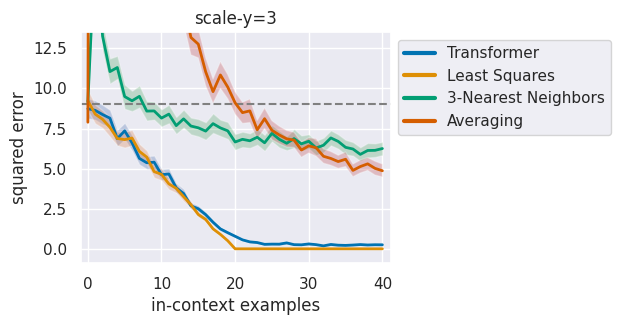

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


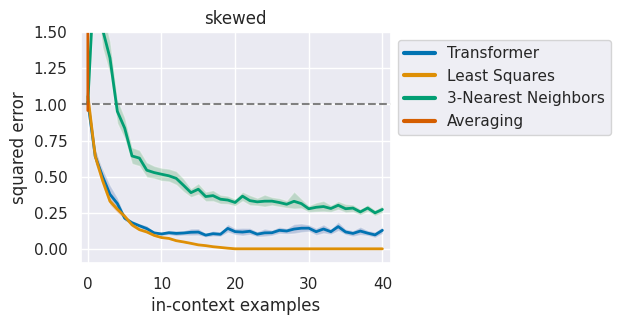

In [5]:
# plot any OOD metrics
for name, metric in metrics.items():
    if name == "standard": continue
   
    if "scale" in name:
        scale = float(name.split("=")[-1])**2
    else:
        scale = 1.0

    trivial = 1.0 if "noisy" not in name else (1+1/n_dims)
    fig, ax = basic_plot(metric, models=models, trivial=trivial * scale)
    ax.set_title(name)
    
    if "ortho" in name:
        ax.set_xlim(-1, n_dims - 1)
    ax.set_ylim(-.1 * scale, 1.5 * scale)

    plt.show()

# Interactive setup

We will now directly load the model and measure its in-context learning ability on a batch of random inputs. (In the paper we average over multiple such batches to obtain better estimates.)

In [6]:
from samplers import get_data_sampler
from tasks import get_task_sampler

In [7]:
model, conf = get_model_from_run(run_path)

n_dims = conf.model.n_dims
batch_size = conf.training.batch_size

data_sampler = get_data_sampler(conf.training.data, n_dims)
task_sampler = get_task_sampler(
    conf.training.task,
    n_dims,
    batch_size,
    **conf.training.task_kwargs
)

In [8]:
task = task_sampler()
xs = data_sampler.sample_xs(b_size=batch_size, n_points=conf.training.curriculum.points.end)
ys = task.evaluate(xs)

In [9]:
with torch.no_grad():
    pred = model(xs, ys)

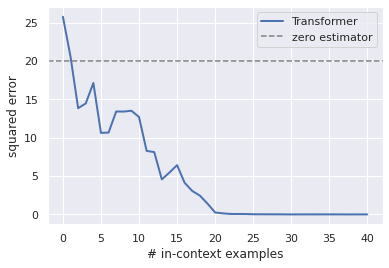

In [10]:
metric = task.get_metric()
loss = metric(pred, ys).numpy()

sparsity = conf.training.task_kwargs.sparsity if "sparsity" in conf.training.task_kwargs else None
baseline = {
    "linear_regression": n_dims,
    "sparse_linear_regression": sparsity,
    "relu_2nn_regression": n_dims,
    "decision_tree": 1,
}[conf.training.task]

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

As an exploration example, let's see how robust the model is to doubling all the inputs.

In [11]:
xs2 = 2 * xs
ys2 = task.evaluate(xs2)
with torch.no_grad():
    pred2 = model(xs2, ys2)

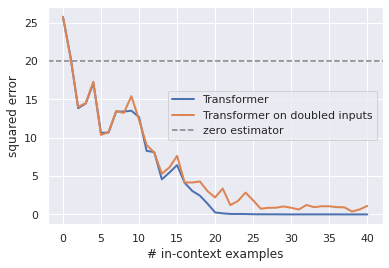

In [12]:
loss2 = metric(pred2, ys2).numpy()

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.plot(loss2.mean(axis=0) / 4, lw=2, label="Transformer on doubled inputs")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

The error does increase, especially when the number of in-context examples exceeds the dimension, but the model is still relatively accurate.